In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np


# Usage of Loc in DF
# Loc is label based and iloc is index based

In [3]:


# crete a sample dataframe
data = pd.DataFrame({
    'age' :     [ 10, 22, 13, 21, 12, 11, 17],
    'section' : [ 'A', 'B', 'C', 'B', 'B', 'A', 'A'],
    'city' :    [ 'Gurgaon', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai'],
    'gender' :  [ 'M', 'F', 'F', 'M', 'M', 'M', 'F'],
    'favourite_color' : [ 'red', np.NAN, 'yellow', np.NAN, 'black', 'green', 'red']
})

# view the data
data

,age,section,city,gender,favourite_color
0,10,A,Gurgaon,M,red
1,22,B,Delhi,F,NaN
2,13,C,Mumbai,F,yellow
3,21,B,Delhi,M,NaN
4,12,B,Mumbai,M,black
5,11,A,Delhi,M,green
6,17,A,Mumbai,F,red


In [4]:
data.loc[data.gender=='M']

,age,section,city,gender,favourite_color
0,10,A,Gurgaon,M,red
3,21,B,Delhi,M,NaN
4,12,B,Mumbai,M,black
5,11,A,Delhi,M,green


In [5]:
data.loc[(data.favourite_color.isnull()),['favourite_color']]='Purple'

In [6]:
data

,age,section,city,gender,favourite_color
0,10,A,Gurgaon,M,red
1,22,B,Delhi,F,Purple
2,13,C,Mumbai,F,yellow
3,21,B,Delhi,M,Purple
4,12,B,Mumbai,M,black
5,11,A,Delhi,M,green
6,17,A,Mumbai,F,red


In [7]:
data.iloc[:,:1]

,age
0,10
1,22
2,13
3,21
4,12
5,11
6,17


In [8]:
data.iloc[[0,2],[1,3]]

,section,gender
0,A,M
2,C,F


In [9]:
data.iloc[0:2,1:-1]

,section,city,gender
0,A,Gurgaon,M
1,B,Delhi,F


# **Starting code again**

**Loading Data**

In [10]:
#Reading Data
all_images= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

#separating data and labels
images = all_images.iloc[:,1:]
labels = all_images.iloc[:,:1]



In [11]:
all_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#viewing dataset details
all_images.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [13]:
#checking for null values in dataset

all_images.isnull().sum().sum()

0

In [14]:
images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
labels.head()

,label
0,1
1,0
2,1
3,4
4,0


In [16]:
#Splitting data to Train and test

train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

In [17]:
train_labels.head()

,label
39317,6
32837,6
16644,4
20005,4
1533,2


# Viewing an Image

In [18]:
type(train_images)


pandas.core.frame.DataFrame

Text(0.5, 1.0, '1')

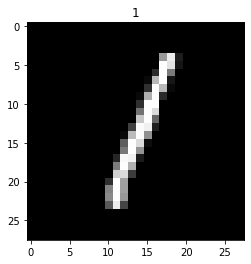

In [19]:
#row to view
i=7

img=train_images.iloc[i].to_numpy().reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([724.,   9.,   3.,   2.,   5.,   5.,   5.,   4.,   5.,  22.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

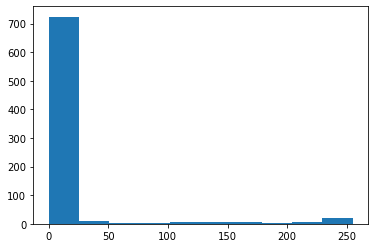

In [20]:
plt.hist(train_images.iloc[i])

# Training the model

> Creating SVM classifier first
then fitting
then test

In [21]:
train_labels.values.ravel()

array([6, 6, 4, ..., 9, 0, 9])

In [22]:
train_labels.values.reshape(-1)

array([6, 6, 4, ..., 9, 0, 9])

ravel() and reshape() are same

In [23]:
clf = svm.SVC()

> Fitting

In [24]:
clf.fit(train_images, train_labels.values.ravel())

SVC()

Testing the model

In [25]:
clf.score(test_images, test_labels)

0.9747619047619047

> If i had used less data my accuracy would have suffered as it was the case when only 5000 rows were considered

> to improve accuracy we can use Neural network instead

> or convert the image to black and white by converting every field value that is greater than 0 to 1

> But i simply used more data to train the model(as there was no issue of computational power